<a href="https://colab.research.google.com/github/raviintechis/Polynomial_Regression/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

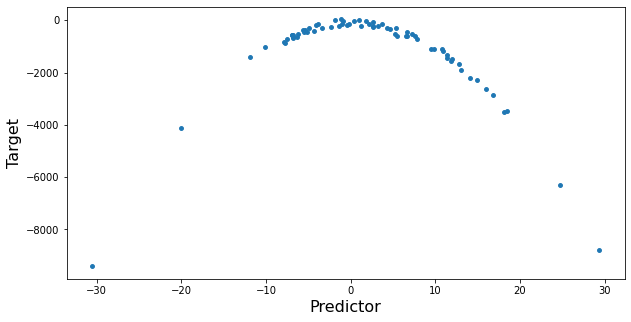

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# for calculating mean_squared error
from sklearn.metrics import mean_squared_error

# creating a dataset with curvilinear relationship
x=10*np.random.normal(0,1,70)
y=10*(-x**2)+np.random.normal(-100,100,70)

# plotting dataset
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [2]:
# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Training Model
lm=LinearRegression()
lm.fit(x.reshape(-1,1),y.reshape(-1,1))

LinearRegression()

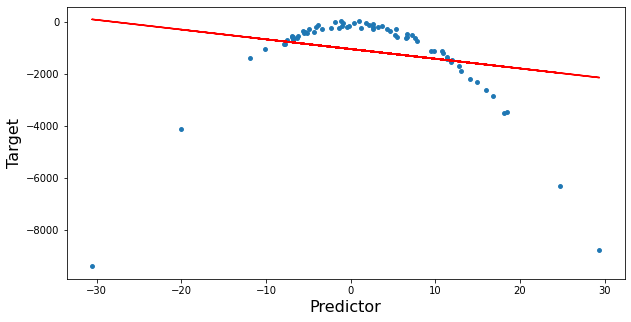

In [3]:
y_pred=lm.predict(x.reshape(-1,1))

# plotting predictions
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [4]:
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))

RMSE for Linear Regression=> 1711.1352174922827


In [5]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

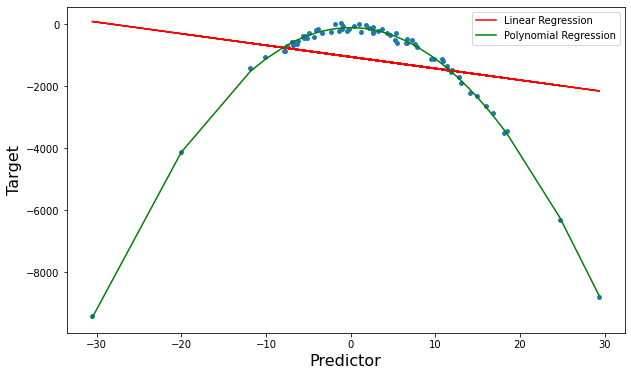

In [6]:
poly_pred=pipe.predict(x.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

In [7]:
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))

RMSE for Polynomial Regression=> 2261.5512491240675
